In [ ]:
import tensorflow as tf

In [4]:
# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("C:/Users/User/Desktop/mnist", one_hot=True)

Extracting C:/Users/User/Desktop/mnist\train-images-idx3-ubyte.gz
Extracting C:/Users/User/Desktop/mnist\train-labels-idx1-ubyte.gz
Extracting C:/Users/User/Desktop/mnist\t10k-images-idx3-ubyte.gz
Extracting C:/Users/User/Desktop/mnist\t10k-labels-idx1-ubyte.gz


In [55]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000026611CD82B0>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000026611CD8BE0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000026611CCFB00>)

In [42]:
img = mnist.train.images
labels = mnist.train.labels

import matplotlib.pyplot as plt

batch = mnist.train.images


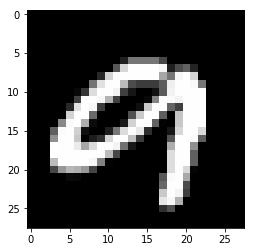

In [53]:
plotData = batch[0]
plotData = plotData.reshape(28, 28)
plt.gray() # use this line if you don't want to see it in color
plt.imshow(plotData)
plt.show()

In [215]:
labels[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [249]:
# Training Parameters

learning_rate = 0.001
num_steps = 3000
batch_size = 32
display_steps = 50

#Network parameters

num_input = 784 # (img shape : 28 * 28)
num_classes = 10 #(0-9 digits)
dropout = 0.75

# tf graph input 
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])

keep_prob = tf.placeholder(tf.float32) # dropout

In [250]:
# Wrapper for simplicity
def conv2d(x, W, b, strides = 1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    
    return tf.nn.relu(x)

In [251]:
def maxpool2d(x, k=2):
    # Maxpooling
    
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

In [252]:
def conv_net(x, weights, biases, dropout): 
    x = tf.reshape(x, shape=[-1, 28, 28, 1])
    
    #conv layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max pooling
    conv1 = maxpool2d(conv1, k=2)
    
    #conv layer2
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max pooling
    conv2 = maxpool2d(conv1, k=2)
    
    # Full connected layer 
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    
    # Applying Dropout
    fc1 = tf.nn.dropout(fc1, dropout)
    # Output class predction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    
    return out

In [253]:
# storing layers, weights and bias

weights = {
    # 5 x 5 conv, 1 input, 32 output
    'wc1' : tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2' : tf.Variable(tf.random_normal([5, 5, 32, 64])),
    # Fully connected, 7*7*64 inputs, 1024 outputs
    'wd1' : tf.Variable(tf.random_normal([7*7*32, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out' : tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1' : tf.Variable(tf.random_normal([32])),
    'bc2' : tf.Variable(tf.random_normal([64])),
    'bd1' : tf.Variable(tf.random_normal([1024])),
    'out' : tf.Variable(tf.random_normal([num_classes])),
}

In [254]:
# Construct Model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Calc loss and optimization
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Eval model
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

init = tf.global_variables_initializer()



In [369]:
# Start training
# Run the initializer
saver = tf.train.Saver()

with tf.Session() as sess:
    
    sess.run(init)
    dict_value = {}
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_steps == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            dict_value[step] = acc
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    # Calculate accuracy for 256 MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels,
                                      keep_prob: 1.0}))

    
    saver.save(sess, 'my_mnist_model',global_step=1000)


Step 1, Minibatch Loss= 2665.9756, Training Accuracy= 0.312
Step 50, Minibatch Loss= 286.3756, Training Accuracy= 0.625
Step 100, Minibatch Loss= 216.4959, Training Accuracy= 0.656
Step 150, Minibatch Loss= 38.2096, Training Accuracy= 0.906
Step 200, Minibatch Loss= 65.9722, Training Accuracy= 0.906
Step 250, Minibatch Loss= 206.2130, Training Accuracy= 0.844
Step 300, Minibatch Loss= 116.7280, Training Accuracy= 0.844
Step 350, Minibatch Loss= 64.3194, Training Accuracy= 0.875
Step 400, Minibatch Loss= 82.2787, Training Accuracy= 0.906
Step 450, Minibatch Loss= 69.3088, Training Accuracy= 0.906
Step 500, Minibatch Loss= 58.7953, Training Accuracy= 0.875
Step 550, Minibatch Loss= 80.7905, Training Accuracy= 0.844
Step 600, Minibatch Loss= 102.9787, Training Accuracy= 0.938
Step 650, Minibatch Loss= 41.6129, Training Accuracy= 0.969
Step 700, Minibatch Loss= 173.3861, Training Accuracy= 0.875
Step 750, Minibatch Loss= 91.2747, Training Accuracy= 0.938
Step 800, Minibatch Loss= 158.5760,

AttributeError: 'numpy.float32' object has no attribute 'name'

In [346]:
sess.close

<bound method BaseSession.close of <tensorflow.python.client.session.Session object at 0x000002661C4B4A20>>

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

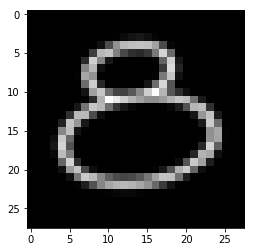

In [367]:
from PIL import Image
import PIL.ImageOps
from scipy.misc import imresize
img = Image.open('img.jpg')

im = PIL.ImageOps.invert(img)
im = imresize(im,(28,28))
im = np.mean(im, axis = 2)

plt.imshow(im)
sess.run(prediction, feed_dict = {X:im.reshape(1,-1), keep_prob:1.0})


In [355]:
pwd


'C:\\Users\\User'

In [358]:
sess.run(accuracy, feed_dict={X:im.reshape(1,-1),
                                  Y: mnist.test.labels,
                                  keep_prob: 1.0})

0.098

In [359]:
    sess.run(accuracy, feed_dict={X: mnist.test.images,
                                  Y: mnist.test.labels,
                                  keep_prob: 1.0})

0.9614

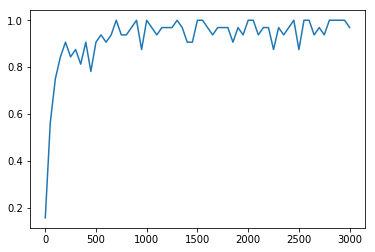

In [351]:
lists = sorted(dict_value.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(x, y)
plt.show()